In [1]:
# Importing pandas and numpy for initial data import and cleaning
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.4.4
1.21.5


In [2]:
# Initial import and read of the dataset from locally saved folder
data = pd.read_csv("C:\\Users\\Victor\\Documents\\Data Science Projects\\Cybersecurity\\breach_report.csv")
# Preview first lines of loaded data
data.head()

,name_of_covered_entity,state,covered_entity_type,individuals_affected,breach_submission_date,type_of_breach,location_of_breached_information,business_associate_present,web_description
0,iTrust Wellness Group,SC,Healthcare Provider,981,8/10/2023,Hacking/IT Incident,Email,No,NaN
1,Madera County,CA,Health Plan,1146,8/9/2023,Unauthorized Access/Disclosure,Email,No,NaN
2,PCC Pediatric EHR Solutions,VT,Business Associate,520,8/9/2023,Unauthorized Access/Disclosure,Email,Yes,NaN
3,Premera Blue Cross,WA,Health Plan,33212,8/8/2023,Hacking/IT Incident,Network Server,Yes,NaN
4,Redwood Coast Regional Center,CA,Healthcare Provider,1345,8/7/2023,Hacking/IT Incident,Email,No,NaN


In [3]:
data.head().to_html('data_head.html', index=False)

In [4]:
data = data.drop("web_description", axis=1)

# Remove rows with blank values
data = data.dropna()

# Get the number of rows in the cleaned-up DataFrame
row_count = data.shape[0]

# Print the number of rows
print("Number of rows in the cleaned-up DataFrame:", row_count)

Number of rows in the cleaned-up DataFrame: 900


In [5]:
# Summary table for "state" column
state_counts = data['state'].value_counts()
state_percentages = data['state'].value_counts(normalize=True) * 100
state_summary = pd.DataFrame({'Count': state_counts, '% of Total': state_percentages})
state_summary = state_summary.sort_values(by='Count', ascending=False)
print("Summary table for 'state' column:")
print(state_summary)

Summary table for 'state' column:
    Count  % of Total
NY     74    8.222222
TX     71    7.888889
CA     68    7.555556
PA     50    5.555556
IL     44    4.888889
MA     42    4.666667
FL     40    4.444444
OH     37    4.111111
NJ     33    3.666667
IN     32    3.555556
MI     32    3.555556
NC     26    2.888889
GA     24    2.666667
AZ     20    2.222222
TN     19    2.111111
VA     18    2.000000
KS     18    2.000000
WA     18    2.000000
MO     16    1.777778
CT     16    1.777778
MD     15    1.666667
MN     15    1.666667
WI     15    1.666667
UT     12    1.333333
OR     11    1.222222
NH     11    1.222222
IA     10    1.111111
KY      9    1.000000
NE      9    1.000000
OK      9    1.000000
CO      8    0.888889
WV      8    0.888889
AL      7    0.777778
SC      7    0.777778
RI      7    0.777778
AR      6    0.666667
DE      5    0.555556
NM      5    0.555556
NV      3    0.333333
SD      3    0.333333
HI      3    0.333333
ME      3    0.333333
LA      3    0.33333

In [6]:
# Obtain the population data for each state (from StatsAmerica.org)
population = {
    'CA': 39029342,'TX': 30029572,'FL': 22244823,'NY': 19677151,'PA': 12972008,'IL': 12812032,'OH': 11756058,
    'GA': 10912876,'NC': 10698973,'MI': 10034113,'NJ': 9288994,'VA': 8683619,'WA': 7785786,'AZ': 7359197,
    'TN': 7051339,'MA': 6981974,'IN': 6833037,'MO': 6177957,'MD': 6177224,'WI': 5893718,'CO': 5773714,
    'MN': 5706494,'SC': 5118425,'AL': 5024279,'LA': 4657757,'KY': 4505836,'OR': 4237256,'OK': 3959353,
    'CT': 3605944,'UT': 3271616,'IA': 3179849,'NV': 3179849,'AK': 731545,'MS': 2965997,'KS': 2913314,
    'NM': 2117522,'NE': 1961504,'ID': 1893147,'WV': 1778070,'HI': 1461933,'NH': 1377529,'ME': 1377529,
    'MT': 1086767,'RI': 1097379,'DE': 1001687,'SD': 886667,'ND': 770026,'DC': 705749,'VT': 643503
}

# Calculate the "Breaches per Million People" metric
state_summary['Breaches per Million People'] = (state_summary['Count'] / state_summary.index.map(population)) * 1_000_000

# Sort the DataFrame by the calculated metric
state_summary = state_summary.sort_values(by='Breaches per Million People', ascending=False)

# Display the top 10 states by the metric
top_10_states = state_summary.head(10)
print("Top 10 States by Breaches per Million People:")
print(top_10_states)

Top 10 States by Breaches per Million People:
    Count  % of Total  Breaches per Million People
NH     11    1.222222                     7.985313
RI      7    0.777778                     6.378835
KS     18    2.000000                     6.178531
MA     42    4.666667                     6.015491
DE      5    0.555556                     4.991579
IN     32    3.555556                     4.683130
NE      9    1.000000                     4.588316
WV      8    0.888889                     4.499260
CT     16    1.777778                     4.437118
AK      3    0.333333                     4.100910


In [7]:
# Summary table for "covered_entity_type" column
entity_type_counts = data['covered_entity_type'].value_counts()
entity_type_percentages = data['covered_entity_type'].value_counts(normalize=True) * 100
entity_type_summary = pd.DataFrame({'Count': entity_type_counts, '% of Total': entity_type_percentages})
entity_type_summary = entity_type_summary.sort_values(by='Count', ascending=False)
print("\nSummary table for 'covered_entity_type' column:")
print(entity_type_summary)


Summary table for 'covered_entity_type' column:
                           Count  % of Total
Healthcare Provider          569   63.222222
Business Associate           204   22.666667
Health Plan                  126   14.000000
Healthcare Clearing House      1    0.111111


In [8]:
# Aggregate the sum of individuals affected by state
individuals_affected_by_state = data.groupby('state')['individuals_affected'].sum()

# Add the new column to the state_summary DataFrame
state_summary['Individuals Affected'] = individuals_affected_by_state

# Calculate the correlation coefficient
correlation_coefficient = state_summary['Breaches per Million People'].corr(state_summary['Individuals Affected'])

# Calculate the degrees of freedom
degrees_of_freedom = len(state_summary) - 2

# Calculate the statistical significance
statistical_significance = 0.05

# Display the results
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Statistical Significance: {statistical_significance}")

Correlation Coefficient: -0.02
Degrees of Freedom: 49
Statistical Significance: 0.05


In [9]:
# Summary statistics for "individuals_affected" column
individuals_stats = data['individuals_affected'].describe()
print("\nSummary statistics for 'individuals_affected' column:")
print(individuals_stats)


Summary statistics for 'individuals_affected' column:
count    9.000000e+02
mean     1.198209e+05
std      6.151386e+05
min      5.000000e+02
25%      1.330500e+03
50%      5.370000e+03
75%      3.366250e+04
max      1.127000e+07
Name: individuals_affected, dtype: float64


In [10]:
# Summary table for "type_of_breach" column
breach_type_counts = data['type_of_breach'].value_counts()
breach_type_percentages = data['type_of_breach'].value_counts(normalize=True) * 100
breach_type_summary = pd.DataFrame({'Count': breach_type_counts, '% of Total': breach_type_percentages})
breach_type_summary = breach_type_summary.sort_values(by='Count', ascending=False)
print("\nSummary table for 'type_of_breach' column:")
print(breach_type_summary)


Summary table for 'type_of_breach' column:
                                Count  % of Total
Hacking/IT Incident               728   80.888889
Unauthorized Access/Disclosure    144   16.000000
Theft                              17    1.888889
Loss                                6    0.666667
Improper Disposal                   5    0.555556


In [11]:
# Summary table for "location_of_breached_information" column
location_counts = data['location_of_breached_information'].value_counts()
location_percentages = data['location_of_breached_information'].value_counts(normalize=True) * 100
location_summary = pd.DataFrame({'Count': location_counts, '% of Total': location_percentages})
location_summary = location_summary.sort_values(by='Count', ascending=False)
print("\nSummary table for 'location_of_breached_information' column:")
print(location_summary)


Summary table for 'location_of_breached_information' column:
                                                    Count  % of Total
Network Server                                        575   63.888889
Email                                                 190   21.111111
Paper/Films                                            43    4.777778
Electronic Medical Record                              31    3.444444
Other                                                  10    1.111111
Laptop                                                  9    1.000000
Other Portable Electronic Device                        9    1.000000
Electronic Medical Record, Network Server               7    0.777778
Network Server, Other                                   6    0.666667
Desktop Computer                                        4    0.444444
Electronic Medical Record, Other                        2    0.222222
Desktop Computer, Network Server                        2    0.222222
Desktop Computer, Electronic

In [12]:
# Summary table for "business_associate_present" column
business_assoc_counts = data['business_associate_present'].value_counts()
business_assoc_percentages = data['business_associate_present'].value_counts(normalize=True) * 100
business_assoc_summary = pd.DataFrame({'Count': business_assoc_counts, '% of Total': business_assoc_percentages})
business_assoc_summary = business_assoc_summary.sort_values(by='Count', ascending=False)
print("\nSummary table for 'business_associate_present' column:")
print(business_assoc_summary)


Summary table for 'business_associate_present' column:
     Count  % of Total
No     606   67.333333
Yes    294   32.666667


In [13]:
# Split the "location_of_breached_information" column into separate categories
location_categories = data['location_of_breached_information'].str.get_dummies(sep=',')

# Create new columns for each category
new_columns = ['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']
location_categories = location_categories[new_columns]

# Add the new columns to the DataFrame
data = pd.concat([data, location_categories], axis=1)

# Print the updated DataFrame
print("Updated DataFrame with new columns:")
print(data.head())

Updated DataFrame with new columns:
          name_of_covered_entity state  covered_entity_type  \
0          iTrust Wellness Group    SC  Healthcare Provider   
1                  Madera County    CA          Health Plan   
2    PCC Pediatric EHR Solutions    VT   Business Associate   
3             Premera Blue Cross    WA          Health Plan   
4  Redwood Coast Regional Center    CA  Healthcare Provider   

   individuals_affected breach_submission_date  \
0                   981              8/10/2023   
1                  1146               8/9/2023   
2                   520               8/9/2023   
3                 33212               8/8/2023   
4                  1345               8/7/2023   

                   type_of_breach location_of_breached_information  \
0             Hacking/IT Incident                            Email   
1  Unauthorized Access/Disclosure                            Email   
2  Unauthorized Access/Disclosure                            Email   
3   

In [14]:
# Doing a spot check to ensure entries match with source data

# Filter the DataFrame based on the specified conditions
filtered_data = data[(data['name_of_covered_entity'] == "Narragansett Bay Commission") &
                     (data['individuals_affected'] == 2153) &
                     (data['type_of_breach'] == "Hacking/IT Incident")]

# Print the full rows from the filtered DataFrame
print("Full rows from the DataFrame:")
print(filtered_data)

Full rows from the DataFrame:
          name_of_covered_entity state  covered_entity_type  \
574  Narragansett Bay Commission    RI  Healthcare Provider   

     individuals_affected breach_submission_date       type_of_breach  \
574                  2153               9/1/2022  Hacking/IT Incident   

    location_of_breached_information business_associate_present  Email  \
574                   Network Server                         No      0   

     Network Server  Other  Paper/Films  Desktop Computer  \
574               1      0            0                 0   

     Electronic Medical Record  Laptop  Other Portable Electronic Device  
574                          0       0                                 0  


In [15]:
# Checking out frequencies for "Yes" vs. "No" on the different locations of breached information

# Create separate summary tables for each column
summary_tables = []
columns = ['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']

for column in columns:
    summary_table = data[column].value_counts().reset_index()
    summary_table.columns = [column, 'Count']
    summary_tables.append(summary_table)

# Print the summary tables
for i, column in enumerate(columns):
    print(f"Summary table for '{column}' column:")
    print(summary_tables[i])
    print()

Summary table for 'Email' column:
   Email  Count
0      0    708
1      1    192

Summary table for 'Network Server' column:
   Network Server  Count
0               1    582
1               0    318

Summary table for 'Other' column:
   Other  Count
0      0    889
1      1     11

Summary table for 'Paper/Films' column:
   Paper/Films  Count
0            0    857
1            1     43

Summary table for 'Desktop Computer' column:
   Desktop Computer  Count
0                 0    890
1                 1     10

Summary table for 'Electronic Medical Record' column:
   Electronic Medical Record  Count
0                          0    857
1                          1     43

Summary table for 'Laptop' column:
   Laptop  Count
0       0    890
1       1     10

Summary table for 'Other Portable Electronic Device' column:
   Other Portable Electronic Device  Count
0                                 0    891
1                                 1      9



In [16]:
# Create a summary table for the specified columns
summary_table = pd.DataFrame(columns=['Locations', 'Total Individuals Affected'])

# Iterate over the specified columns
for column in ['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']:
    # Calculate the sum of individuals affected for each category
    individuals_affected = data[data[column] == 1]['individuals_affected'].sum()
    
    # Create a temporary DataFrame for the category
    temp_df = pd.DataFrame({'Locations': [column], 'Total Individuals Affected': [individuals_affected]})
    
    # Append the temporary DataFrame to the summary table
    summary_table = summary_table.append(temp_df, ignore_index=True)
    
# Sort the summary table by the "Total Individuals Affected" column in descending order
summary_table = summary_table.sort_values(by='Total Individuals Affected', ascending=False)

# Print the summary table
print("Summary table:")
print(summary_table)

Summary table:
                          Locations Total Individuals Affected
1                    Network Server                   89409978
2                             Other                   11556795
0                             Email                    5532286
5         Electronic Medical Record                     804171
3                       Paper/Films                     308906
4                  Desktop Computer                     113371
6                            Laptop                      93959
7  Other Portable Electronic Device                      19375


C:\Users\Victor\AppData\Local\Temp\ipykernel_7416\2058541052.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append(temp_df, ignore_index=True)


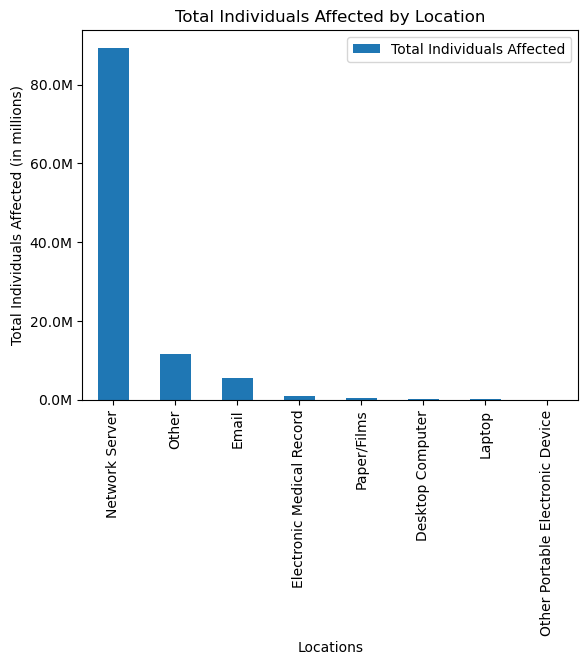

In [42]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort the summary table by the "Total Individuals Affected" column in descending order
summary_table = summary_table.sort_values(by='Total Individuals Affected', ascending=False)

# Create a bar graph of the summary table
ax = summary_table.plot(x='Locations', y='Total Individuals Affected', kind='bar')

# Set the title and axis labels
plt.title('Total Individuals Affected by Location')
plt.xlabel('Locations')
plt.ylabel('Total Individuals Affected (in millions)')

# Define the function to format the y-axis labels in millions
def millions_formatter(x, pos):
    return '{:.1f}M'.format(x/1000000)

# Apply the millions_formatter function to the y-axis labels
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show the plot
plt.show()

In [18]:
import matplotlib.pyplot as plt

# Filter the data for records where Type of Threat is "Hacking/IT Incident"
filtered_data = data[data['type_of_breach'] == 'Hacking/IT Incident']

# Count the occurrences of each category in the filtered data
category_counts = filtered_data[['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']].apply(pd.Series.value_counts).loc[1]

category_counts = category_counts.fillna(0)
print(category_counts)

Email                               158.0
Network Server                      540.0
Other                                 5.0
Paper/Films                           0.0
Desktop Computer                      6.0
Electronic Medical Record            16.0
Laptop                                3.0
Other Portable Electronic Device      0.0
Name: 1, dtype: float64


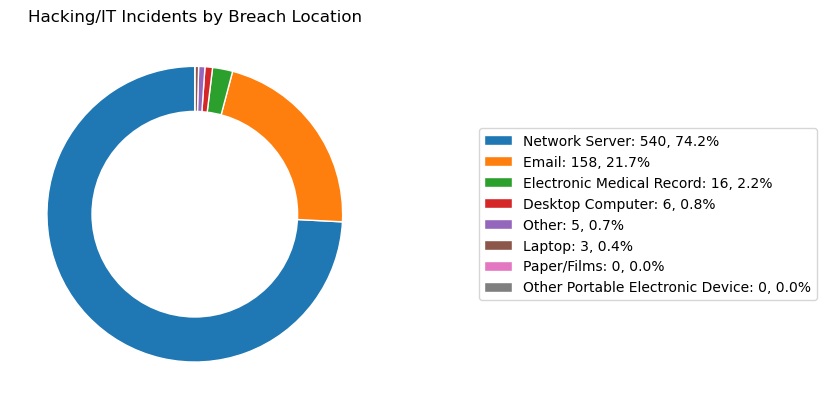

In [19]:
# Sort the category counts in descending order
category_counts_sorted = category_counts.sort_values(ascending=False)

# Create a pie chart of the sorted category counts
plt.pie(category_counts_sorted, labels=None, startangle=90, wedgeprops={'edgecolor': 'white'})

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Create the legend with sorted category name, count, and percentage
legend_labels = ['{}: {}, {:.1%}'.format(label, int(count), count/sum(category_counts_sorted)) for label, count in zip(category_counts_sorted.index, category_counts_sorted)]
plt.legend(legend_labels, bbox_to_anchor=(1.25, 0.5), loc='center left')

# Set the title
plt.title('Hacking/IT Incidents by Breach Location')

# Show the chart
plt.show()

In [20]:
import scipy.stats as stats

# Filter the data for records where Type of Threat is "Hacking/IT Incident"
filtered_data = data[data['type_of_breach'] == 'Hacking/IT Incident']

# Count the occurrences of each category in the filtered data
category_counts = filtered_data[['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']].apply(pd.Series.value_counts).loc[1]

# Replace NaN values with zeros
category_counts = category_counts.fillna(0)

# Define the expected frequencies assuming an equal distribution
expected_freq = (sum(category_counts) / len(category_counts))

# Perform the Chi-Square Goodness of Fit test
chi2, p_value = stats.chisquare(category_counts, f_exp=expected_freq)

# Print the test statistic and p-value
print("Chi-Square Statistic:", chi2)
print("p-value:", p_value)

Chi-Square Statistic: 2754.307692307693
p-value: 0.0
